In [1]:
!pip install yfinance pycaret


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import yfinance as yf
from pycaret.time_series import TSForecastingExperiment

# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(period='max')

# Step 2: Extract only the 'Open' column
open_data = df[['Open']]

# Step 3: Prepare the data for PyCaret
open_data.reset_index(inplace=True)
open_data.columns = ['Date', 'Open']

# Step 4: Initialize PyCaret Time Series Forecasting Experiment
exp = TSForecastingExperiment()
exp.setup(data=open_data['Open'], fh=7, fold=5, session_id=42, n_jobs=-1)  # Using a forecast horizon (fh) of 7 days, increased fold for better validation, and enabling GPU support

# Step 5: Train and compare models
best_model = exp.compare_models(sort='MAE')  # Sorting by Mean Absolute Error for better performance

# Step 6: Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

# Optional: Print forecasted values
print(forecast)


,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3703, 1)"
5,Transformed data shape,"(3703, 1)"
6,Transformed train set shape,"(3696, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:47:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Auto ARIMA


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,1.2991,0.7278,2.6651,3.1107,0.0752,0.0744,-5.9298,2.2360
arima,ARIMA,1.8991,1.0207,3.8896,4.3615,0.1104,0.1122,-10.3844,0.7280
snaive,Seasonal Naive Forecaster,2.1143,1.1167,4.3330,4.7717,0.1237,0.1259,-7.3002,0.4880
polytrend,Polynomial Trend Forecaster,2.2097,1.1381,4.5271,4.8633,0.1238,0.1341,-9.7887,0.4400
grand_means,Grand Means Forecaster,11.6252,5.5945,23.8365,23.9081,0.6726,1.0146,-243.3153,0.5380


KeyboardInterrupt: 

In [6]:
# !pip install yfinance pycaret

import pandas as pd
import yfinance as yf
from pycaret.time_series import TSForecastingExperiment

# Step 1: Fetch the data using yfinance
dat = yf.Ticker("SOXL")
df = dat.history(period='max')

# Step 2: Extract only the 'Open' column
open_data = df[['Open']]

# Step 3: Prepare the data for PyCaret
open_data.reset_index(inplace=True)
open_data.columns = ['Date', 'Open']

# Step 4: Initialize PyCaret Time Series Forecasting Experiment
exp = TSForecastingExperiment()
exp.setup(data=open_data['Open'], fh=7, fold=10, session_id=42, n_jobs=-1, use_gpu=False)  # Using a forecast horizon (fh) of 7 days, increased fold for better validation, enabling parallel processing, and applying data transformation

# Step 5: Train and compare models
best_model = exp.compare_models(sort='MAE', turbo=True)  # Sorting by Mean Absolute Error for better performance, using turbo mode to speed up comparison

# Step 6: Finalize the model and predict future values
final_model = exp.finalize_model(best_model)
forecast = exp.predict_model(final_model)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

# Optional: Print forecasted values
print(forecast)


,Description,Value
0,session_id,42
1,Target,Open
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(3703, 1)"
5,Transformed data shape,"(3703, 1)"
6,Transformed train set shape,"(3696, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,1.2356,0.7167,2.5105,3.0438,0.0742,0.0720,-3.1645,0.3350
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.2831,0.7388,2.6033,3.1315,0.0761,0.0752,-3.6564,0.7040
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.3182,0.7596,2.6752,3.2234,0.0789,0.0761,-2.9503,1.2680
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3660,0.7712,2.7690,3.2691,0.0801,0.0792,-4.0993,0.0880
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.3843,0.7862,2.8048,3.3296,0.0808,0.0809,-4.0147,0.0900
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.3862,0.7868,2.8086,3.3321,0.0809,0.0810,-4.0205,0.0830
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,1.3880,0.7908,2.8133,3.3497,0.0813,0.0810,-4.2863,0.0740
ets,ETS,1.3972,0.7978,2.8313,3.3783,0.0823,0.0814,-4.6979,0.4520
theta,Theta Forecaster,1.3984,0.7932,2.8336,3.3590,0.0821,0.0817,-4.2501,0.2240
exp_smooth,Exponential Smoothing,1.4023,0.8014,2.8410,3.3925,0.0826,0.0818,-4.6481,0.9000


       y_pred
3703  28.7445
3704  29.0045
3705  29.3425
3706  29.4739
3707  29.8446
3708  30.4352
3709  30.7519


In [12]:

forecast = exp.predict_model(final_model, fh=1000)

# Step 7: Plot the forecast
exp.plot_model(final_model, plot='forecast')

print(forecast)

       y_pred
3703  28.7445
3704  29.0045
3705  29.3425
3706  29.4739
3707  29.8446
...       ...
4698  39.8658
4699  39.9574
4700  39.8935
4701  39.8813
4702  39.8669

[1000 rows x 1 columns]


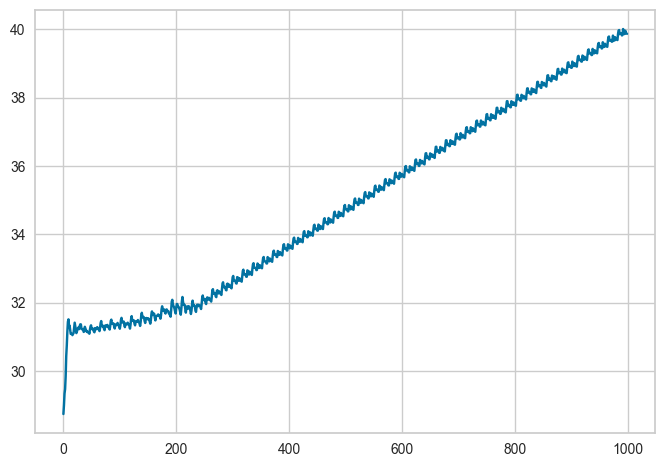

In [27]:
type(forecast)

# to python list
forecast_list = forecast.tolist()

# first define plt
import matplotlib.pyplot as plt
plt.plot(forecast_list)
plt.show()


